## Понижение размерности признакового пространства

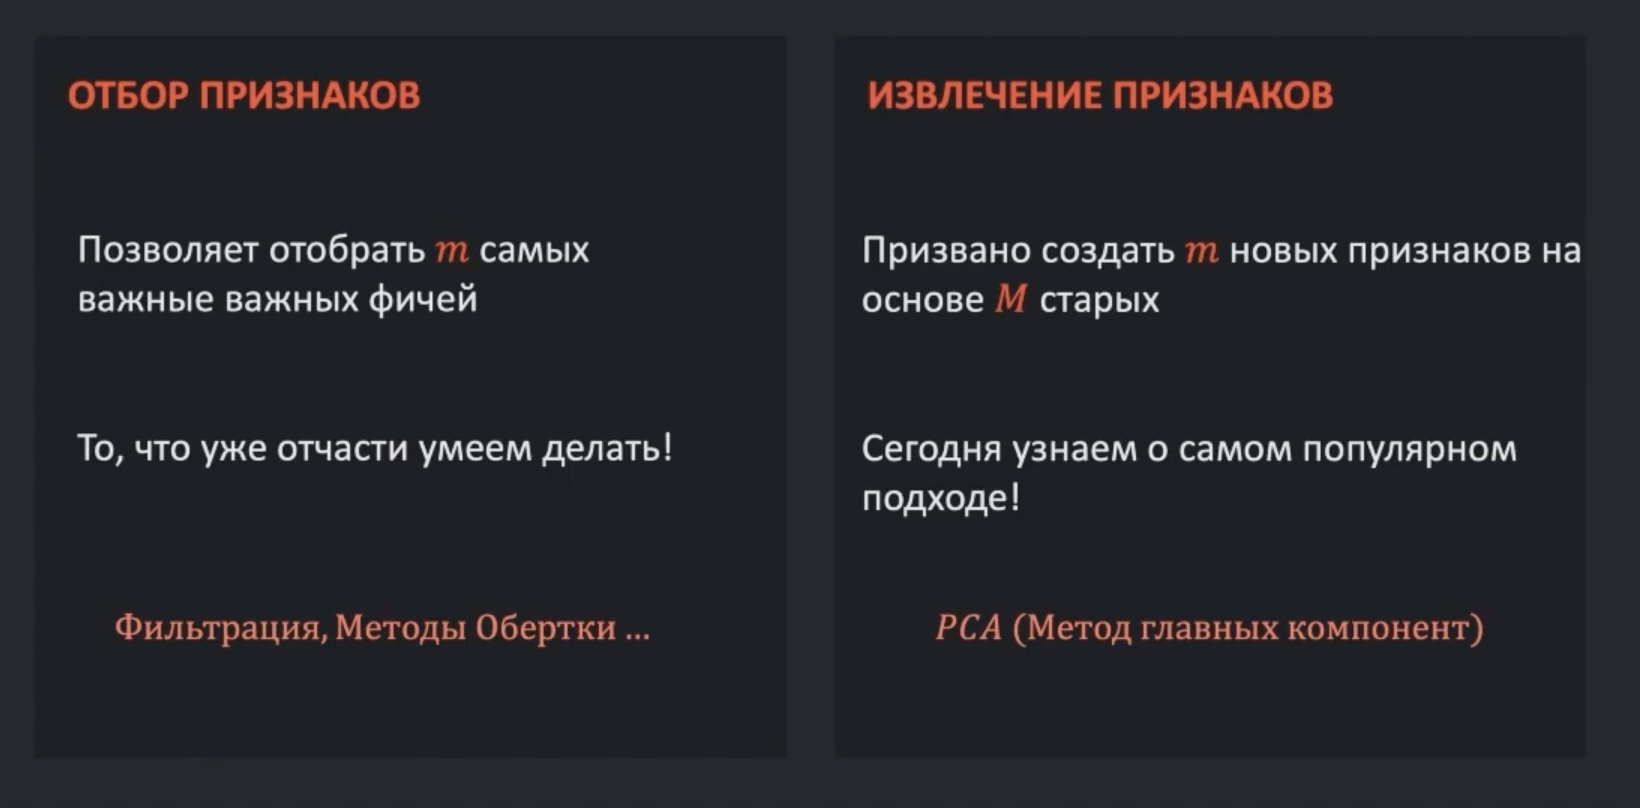
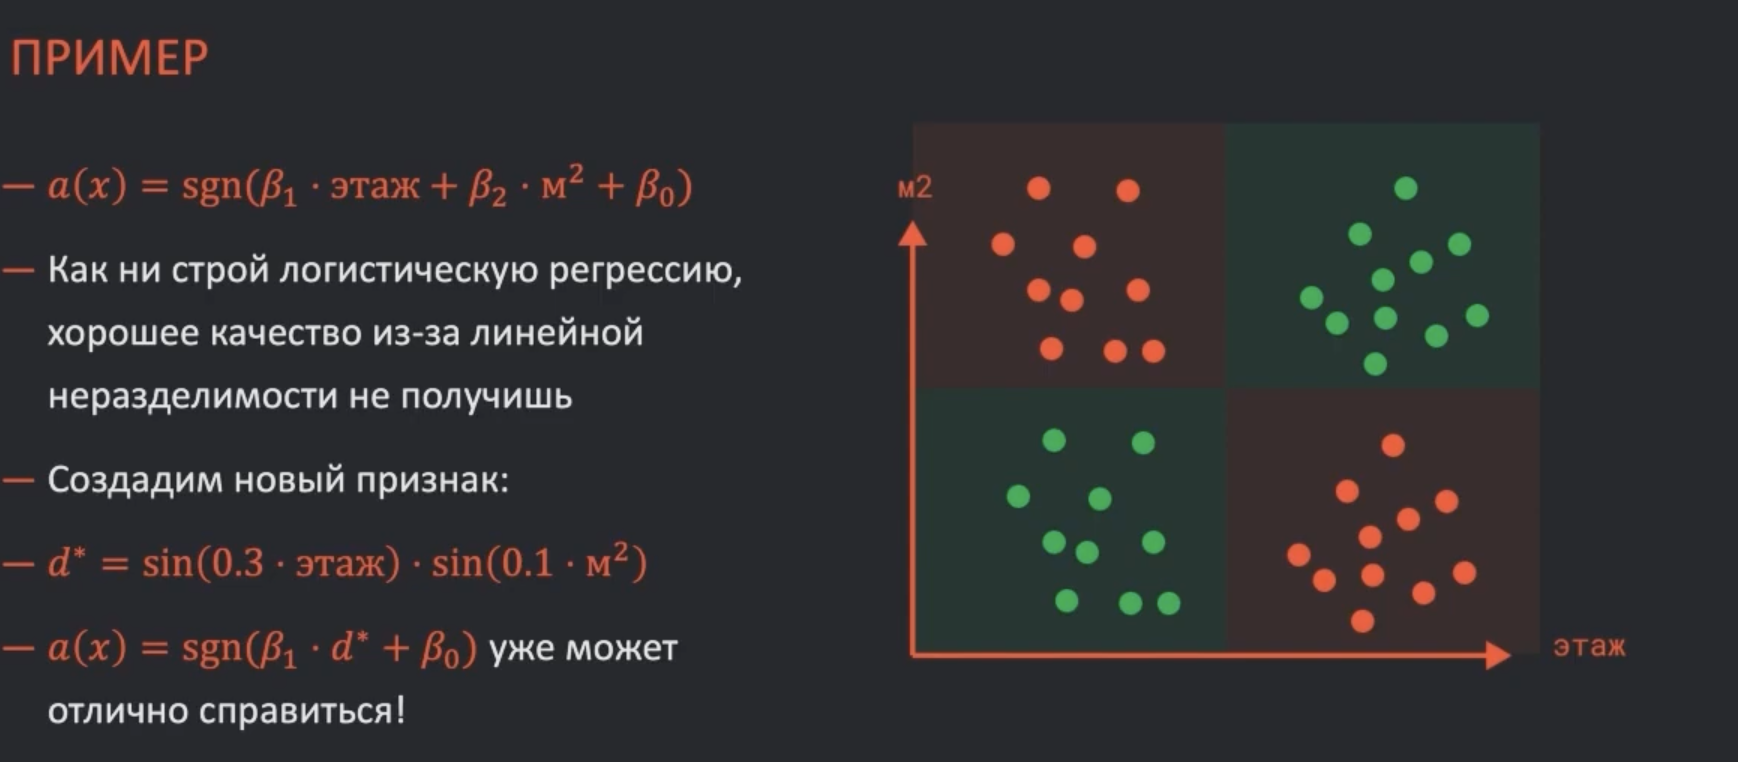

### Метод главных компанент 
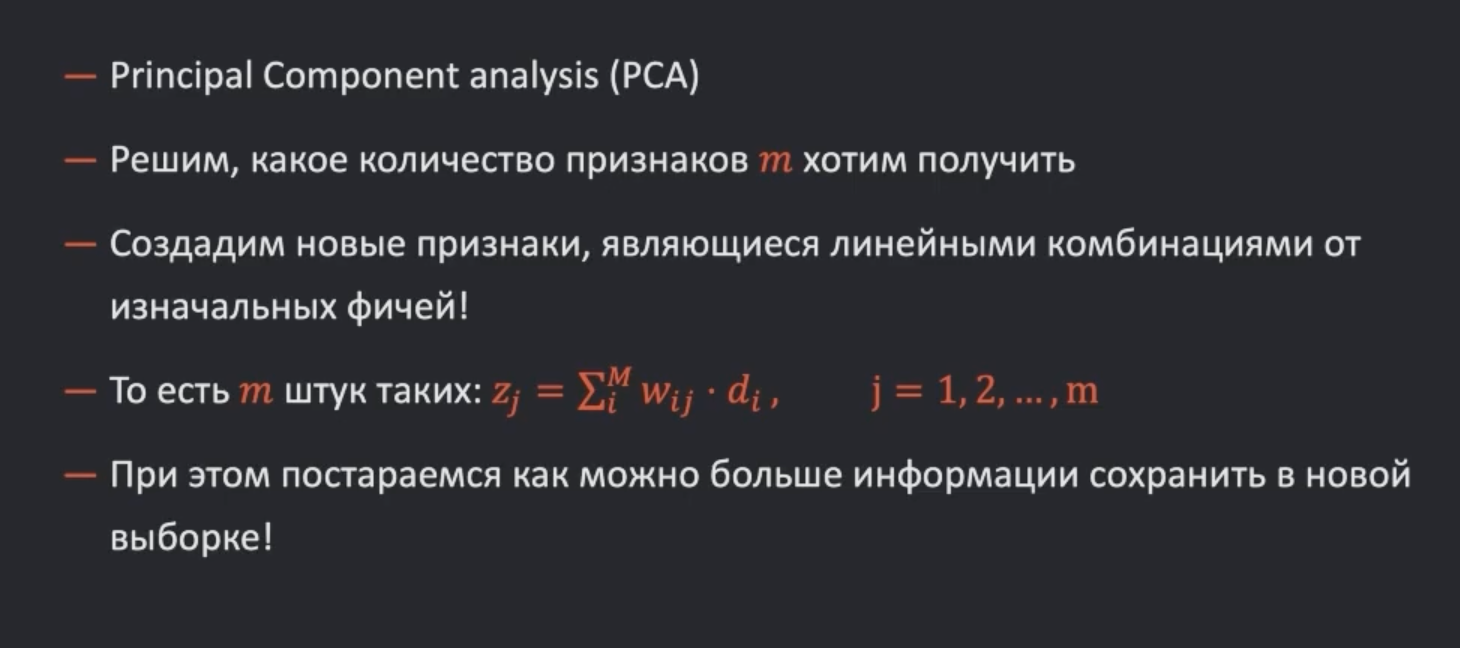
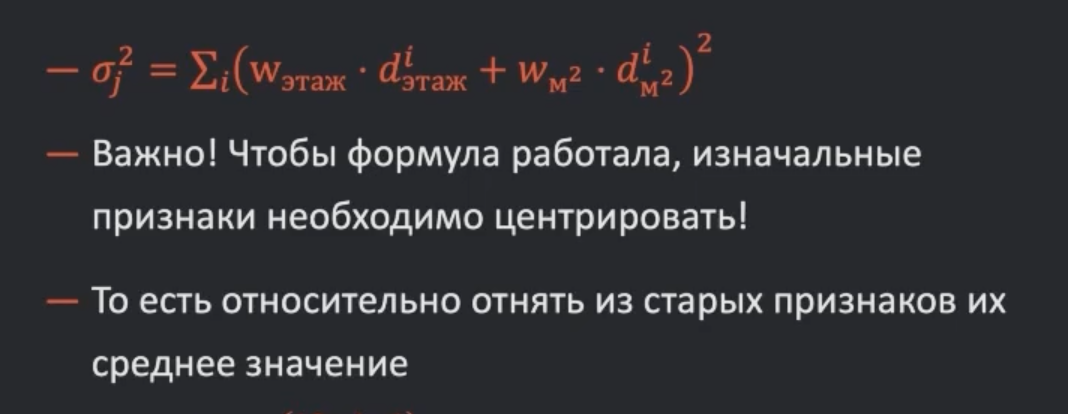
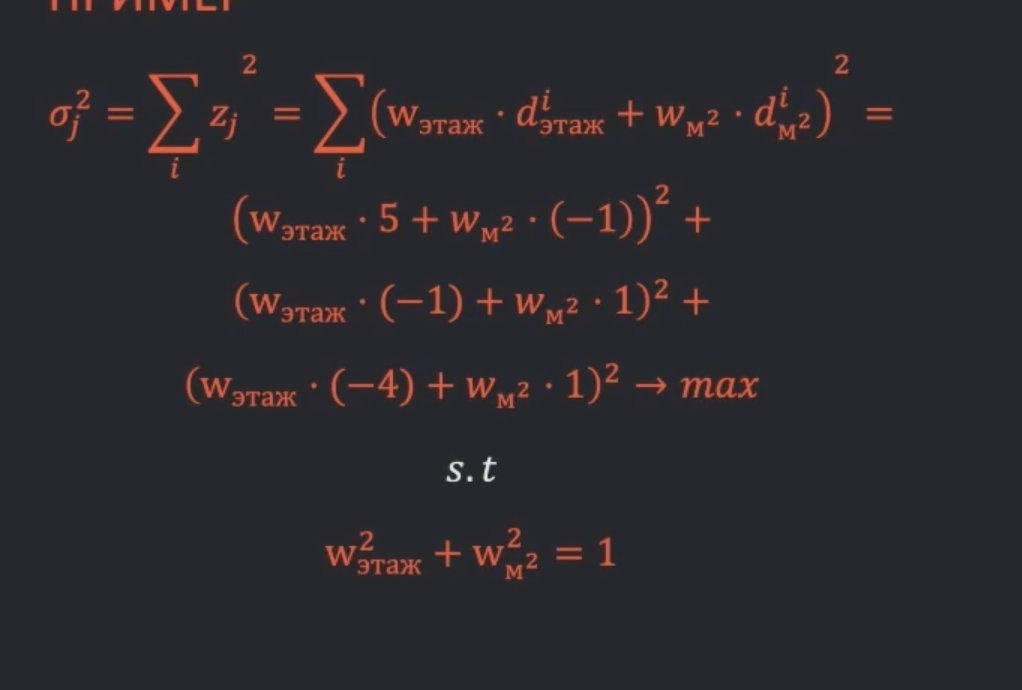
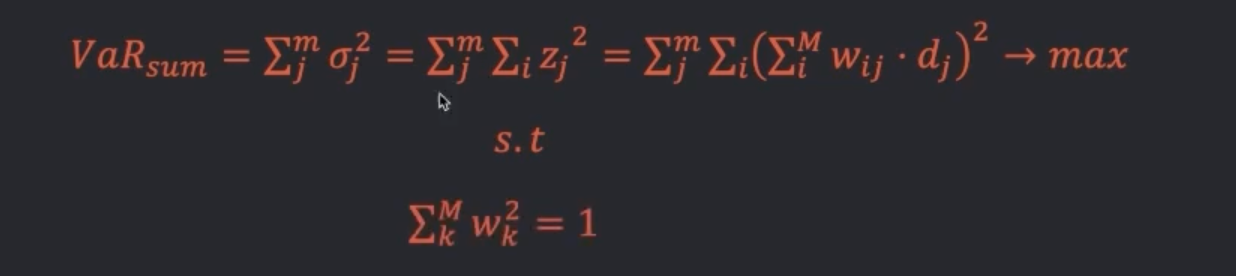

In [ ]:
### Центрируем данные

X = X.subtract(X.mean())

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

PCA_dataset = pca.fit_transform(X) # fit + transform

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2'])

PCA_dataset.head()

pca.explained_variance_ratio_ 

In [ ]:
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=PCA_dataset, x="PCA1", y="PCA2", hue="SEGMENT")

In [ ]:
### Замерим качество для разного количества компонент

score_dict = {}
time_dict = {}

for power in range(1, 11):
    
    pca_dataset = PCA(n_components=power).fit_transform(X)
    
    begin_time = datetime.datetime.now()

    pipe.fit(pca_dataset, Y)

    time_dict[power] = (datetime.datetime.now() - begin_time).microseconds
    score_dict[power] = pipe.score(pca_dataset, Y)


In [ ]:
fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = PCA_dataset_3d['SEGMENT'].replace(['A', 'B', 'C', 'D'],
                                            ['orange', 'green', 'red', 'blue'])

ax.scatter3D(PCA_dataset_3d['PCA_1'], 
             PCA_dataset_3d['PCA_2'],
             PCA_dataset_3d['PCA_3'], 
             c=colors);

### t-SNE (t-distributed Stochastic Neighbor Embedding)

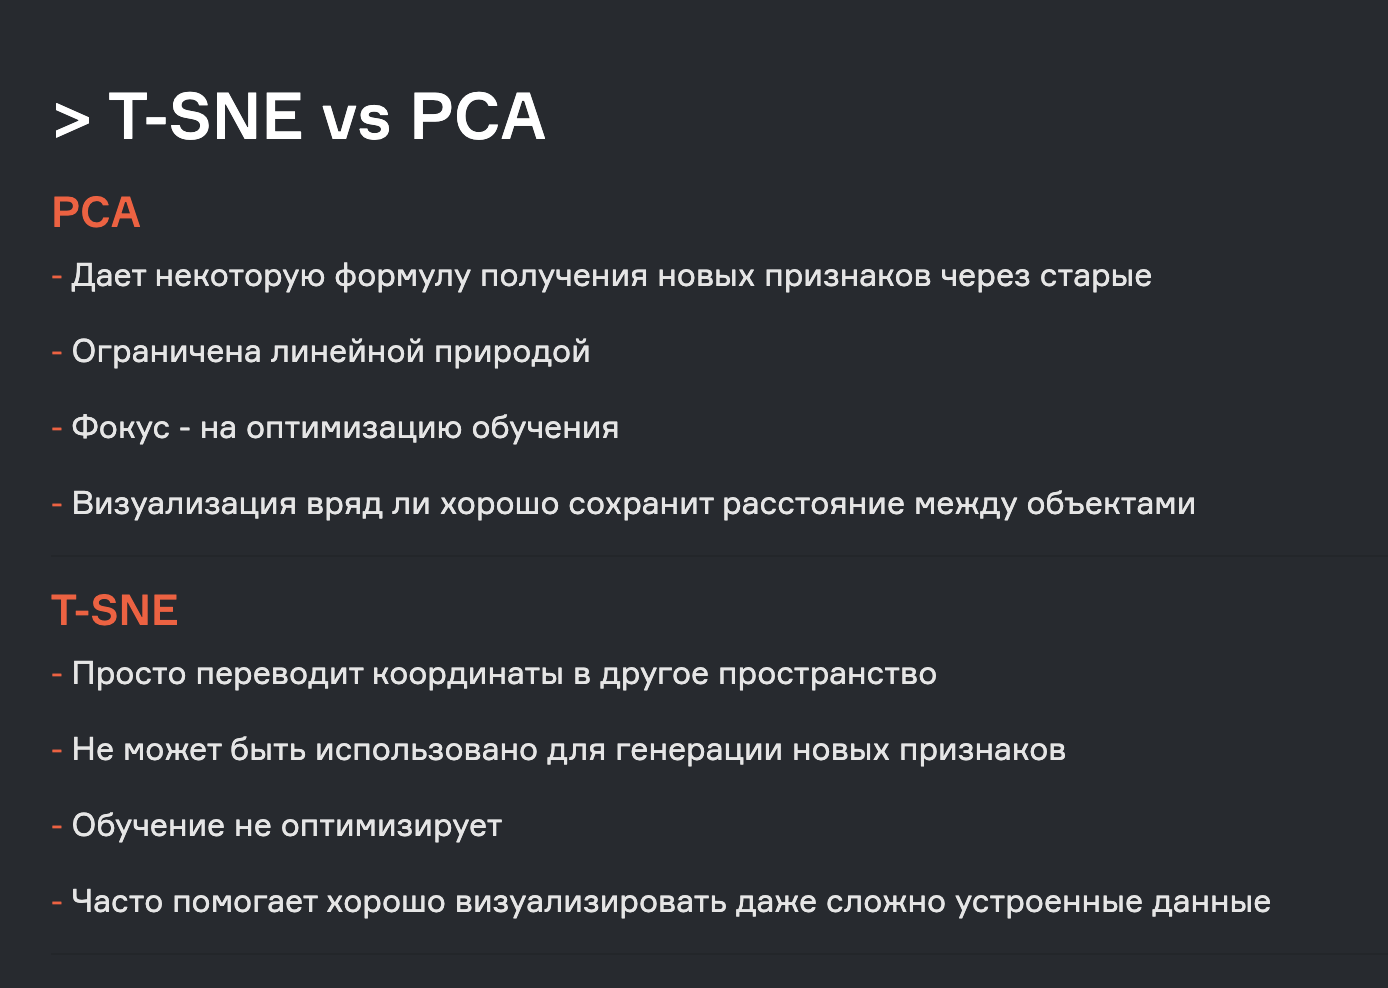
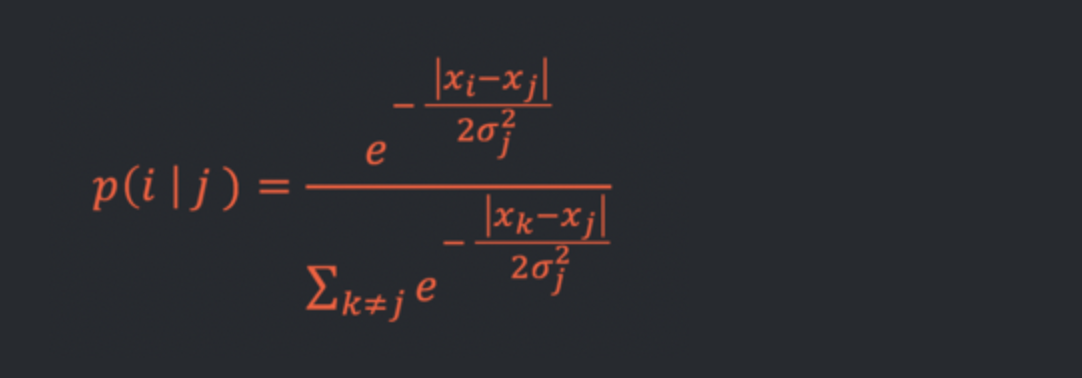
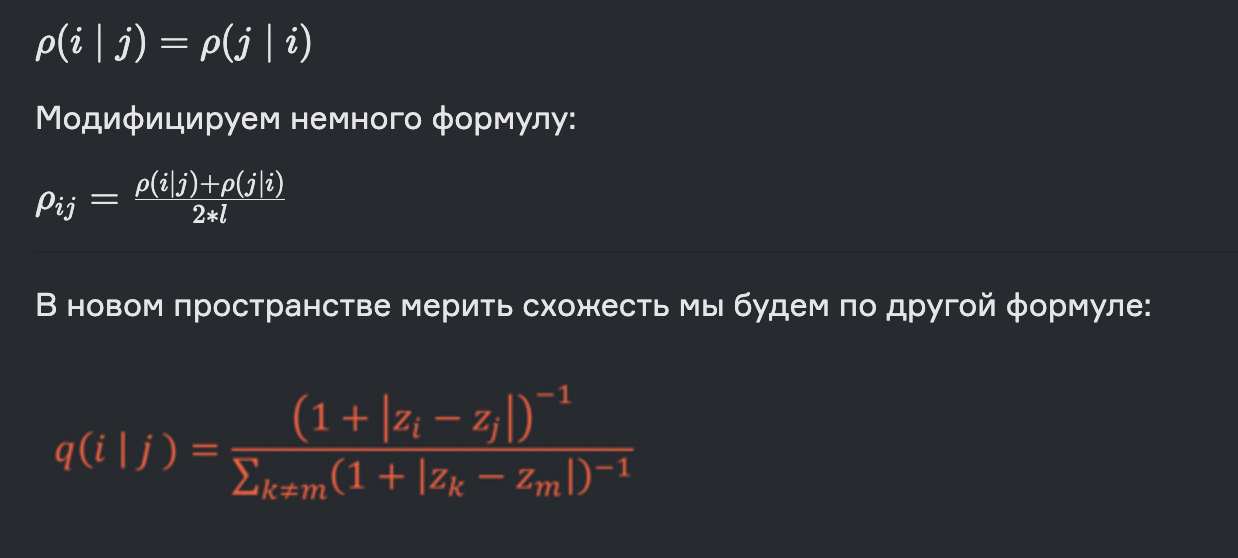
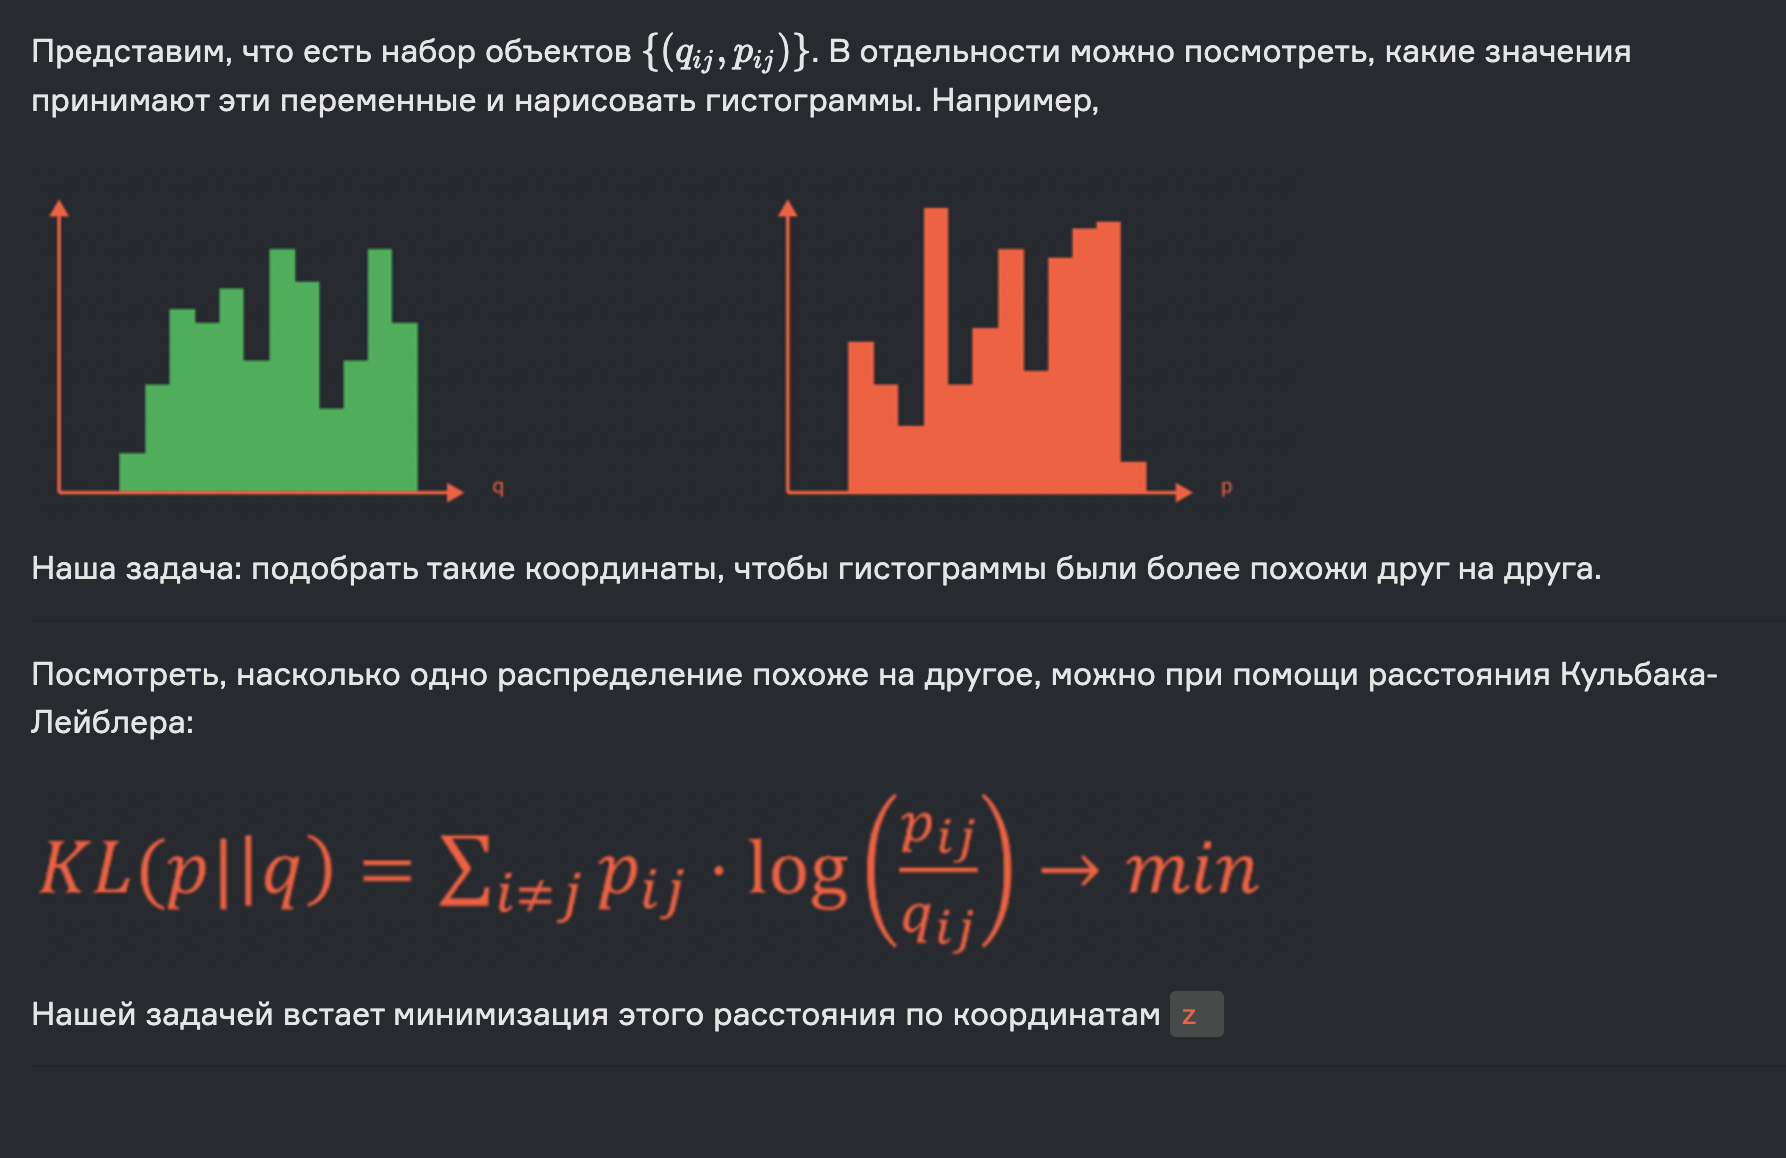

In [ ]:
### Произведем T-SNE преобразование

from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2).fit_transform(X)

In [ ]:
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=X_tsne, x="Tsne_1st_component", 
                y="Tsne_2nd_component", 
                hue="SEGMENT")